In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chisquare, zscore, chi2_contingency
from sklearn import tree
# from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import missingno as mano
import MLtemplate

In [2]:
healthdf = MLtemplate.import_data("health.csv")

In [3]:
healthdf.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
MLtemplate.data_summary(healthdf,5)

###### Shape ######
(5110, 12)
###### Dimensions ######
2
###### Dtypes ######
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
###### head ######
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36

In [10]:
healthdf.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
healthdf.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [8]:
healthdf.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

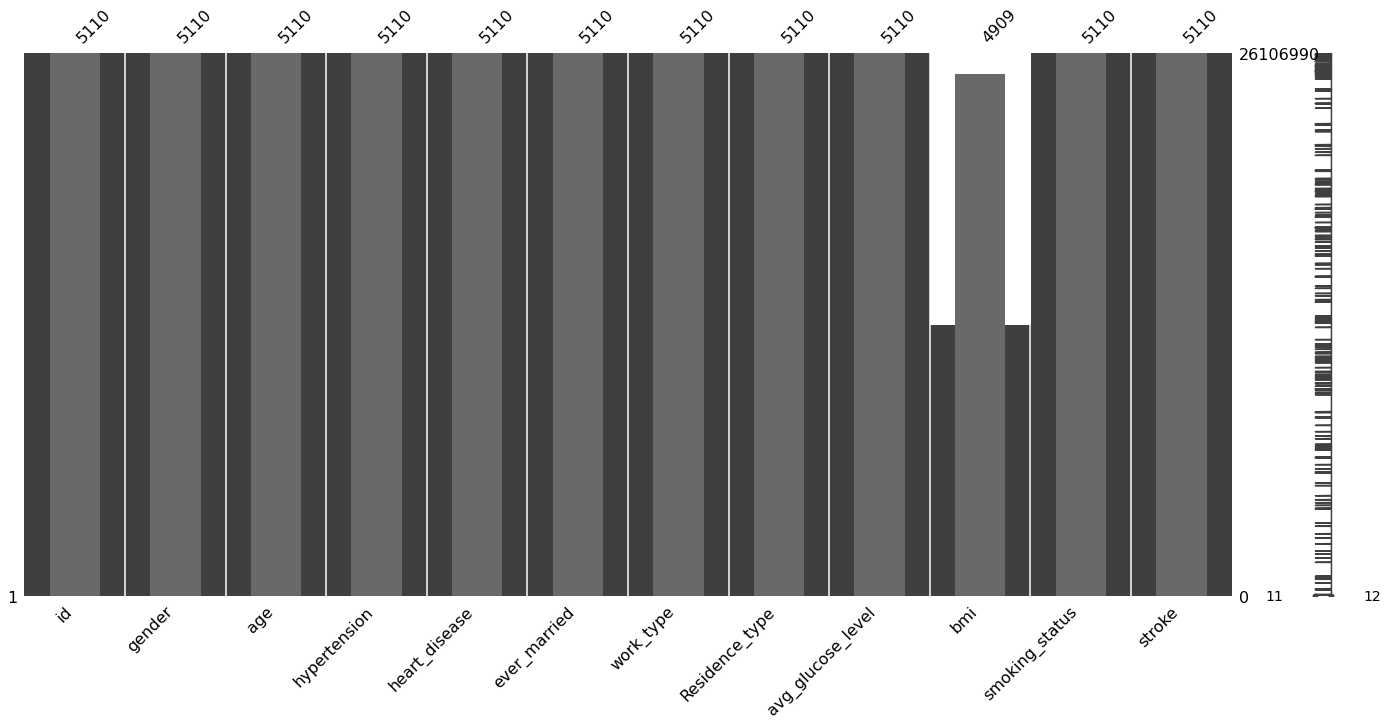

In [12]:
MLtemplate.analyze_missing(healthdf)

In [13]:
MLtemplate.missing_values(healthdf)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [14]:
######fill missing values
MLtemplate.median_impute(healthdf,"bmi")

In [15]:
MLtemplate.missing_values(healthdf)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [16]:
healthdf['hypertension'] = healthdf['hypertension'].astype(str).replace({'1':'Yes','0':'No'})


healthdf['heart_disease'] = healthdf['heart_disease'].astype(str).replace({'1':'Yes','0':'No'})


In [17]:
healthdf.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
healthdf.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [19]:
healthdf = pd.get_dummies(healthdf)


In [20]:
healthdf

,id,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_No,hypertension_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.6,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,202.21,28.1,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.5,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,171.23,34.4,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,174.12,24.0,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,28.1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,125.20,40.0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,82.99,30.6,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,166.29,25.6,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [23]:
healthdf = MLtemplate.drop_columns(healthdf, "id")

In [24]:
healthdf

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_No,hypertension_Yes,heart_disease_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,202.21,28.1,1,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,105.92,32.5,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,171.23,34.4,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,174.12,24.0,1,1,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,83.75,28.1,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,125.20,40.0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,82.99,30.6,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,166.29,25.6,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [25]:
y = MLtemplate.deep_copy(healthdf["stroke"])

In [26]:
predictors = MLtemplate.deep_copy(healthdf.loc[:, healthdf.columns != 'stroke'])

In [27]:
predictors

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_No,hypertension_Yes,heart_disease_No,heart_disease_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,202.21,28.1,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,105.92,32.5,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,171.23,34.4,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,174.12,24.0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,83.75,28.1,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,125.20,40.0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,82.99,30.6,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,166.29,25.6,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [30]:
MLtemplate.predict_model(healthdf, "KNN", "classification", predictors, y, n=4)

####### confusion matrix ########
[[965   1]
 [ 55   1]]
######## confusion report #########
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.50      0.02      0.03        56

    accuracy                           0.95      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022

###### log loss ###########
log loss :  1.89253647525678
######### AUC ########
0.508410973084886
